In [72]:
%matplotlib inline
%reset
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import scipy
import csv
import math

import SchemDraw as schem # to draw schematics (install using 'pip install SchemDraw')
import SchemDraw.elements as e

import skrf as rf # scikit-rf (install using 'conda -c scikit-rf scikit-rf')

import sympy # sympy (install using 'conda -c sympy sympy')
from sympy import I # imaginary symbol

rf.stylely() # enable scikit-rf plot styles
sympy.init_printing(use_latex='mathjax') # print sympy equations in MathJAX (for Jupyter)

def smart_convert(string):
    if " Hz" in string:
        return float(string.replace(" Hz", "e0"))
    elif " kHz" in string:
        return float(string.replace(" kHz", "e3"))
    elif " MHz" in string:
        return float(string.replace(" MHz", "e6"))
    elif " GHz" in string:
        return float(string.replace(" GHz", "e9"))
    elif "j" in string:
        return complex(string.replace(" ", "").replace("j", "") + "j")
    else:
        print('warning! smart_convert')
        return None
    
def complex_to_db(cmpx_number):
    if isinstance(cmpx_number, list) or isinstance(cmpx_number, np.ndarray):
        return [20.0 * math.log(math.sqrt(x.real**2 + x.imag**2), 10) for x in cmpx_number]
    else:
        return 20.0 * math.log(math.sqrt(cmpx_number.real**2 + cmpx_number.imag**2), 10)

def read_csv(filename, row_offset=3):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for i in range(0, row_offset):
            next(reader)
        for row in reader:
            row = [smart_convert(d) for d in row]
            data += [row]
    return data
def mag2db(mag):
    return np.multiply(20.0, np.log10(mag))
def db2mag(db):
    return np.power(10, np.divide(db, 20.0))
def rad2deg(rad):
    return np.multiply(np.divide(rad, (2*np.pi)), 360.0)
def deg2rad(deg):
    return np.multiply(np.divide(deg, 360.0), 2*np.pi)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


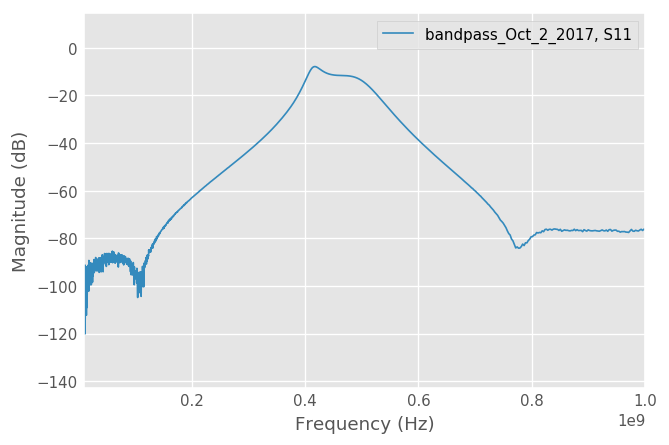

In [73]:
#bpf_1_data = rf.Network('data/bfp.s2p')
bpf_1_data = rf.Network('data/bandpass_Oct_2_2017.S2P')
bpf_1_data.s21.plot_s_db()
bpf_1_sim = read_csv('data/original_bpf_sim.csv')

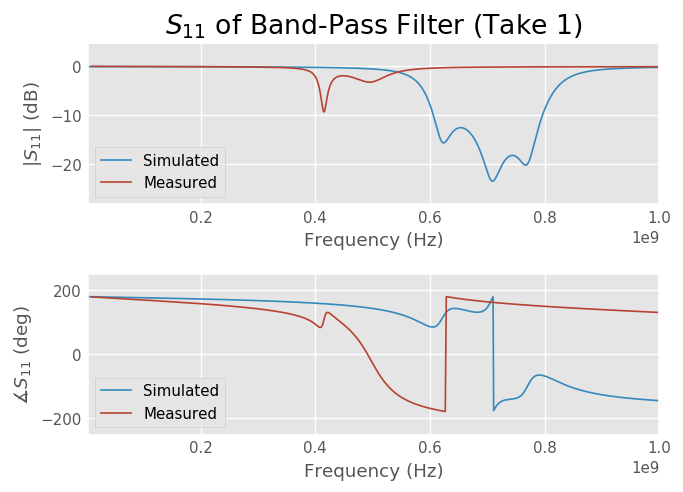

In [74]:
measured_S11 = bpf_1_data.s[:,0,0]
measured_freqs = np.divide(bpf_1_data.frequency.w, 2*np.pi)
sim_S11 = [x[1] for x in bpf_1_sim]
sim_freqs = [x[0] for x in bpf_1_sim]
w, h = plt.figaspect(0.7)
fig = plt.figure(figsize=(w,h))
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(sim_freqs, mag2db(np.abs(sim_S11)))
plt.plot(measured_freqs, mag2db(np.abs(measured_S11)))
plt.legend(['Simulated', 'Measured'])
plt.title('$S_{11}$ of Band-Pass Filter (Take 1)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(sim_freqs, rad2deg(np.angle(sim_S11)))
plt.plot(measured_freqs, rad2deg(np.angle(measured_S11)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$\measuredangle S_{11}$ (deg)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/bpf_take1_S11.pdf', bbox_inches='tight', dpi=300)

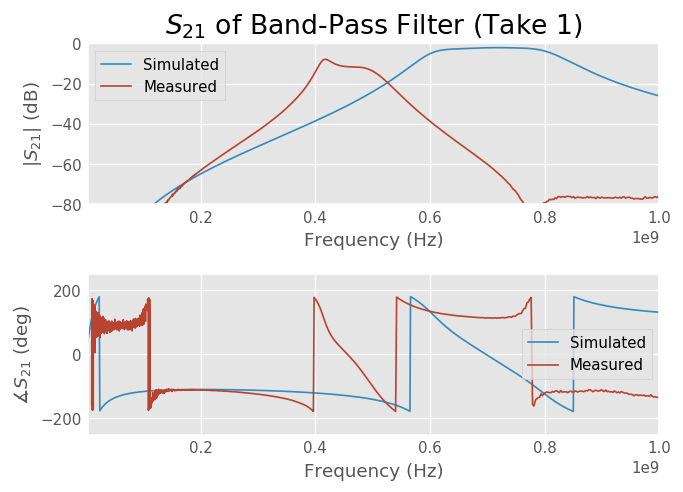

In [75]:
measured_S21 = bpf_1_data.s[:,1,0]
measured_freqs = np.divide(bpf_1_data.frequency.w, 2*np.pi)
sim_S21 = [x[2] for x in bpf_1_sim]
sim_freqs = [x[0] for x in bpf_1_sim]
w, h = plt.figaspect(0.7)
fig = plt.figure(figsize=(w,h))
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(sim_freqs, mag2db(np.abs(sim_S21)))
plt.plot(measured_freqs, mag2db(np.abs(measured_S21)))
plt.ylim([-80, 0])
plt.legend(['Simulated', 'Measured'])
plt.title('$S_{21}$ of Band-Pass Filter (Take 1)')
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(sim_freqs, rad2deg(np.angle(sim_S21)))
plt.plot(measured_freqs, rad2deg(np.angle(measured_S21)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$\measuredangle S_{21}$ (deg)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/bpf_take1_S21.pdf', bbox_inches='tight', dpi=300)

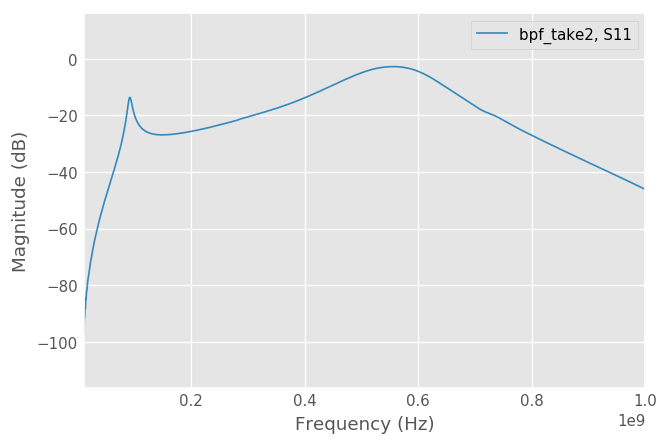

In [76]:
bpf_2_data = rf.Network('data/bpf_take2.S2P')
bpf_2_data.s21.plot_s_db()
bpf_2_sim = read_csv('data/new_bpf_sim.csv')

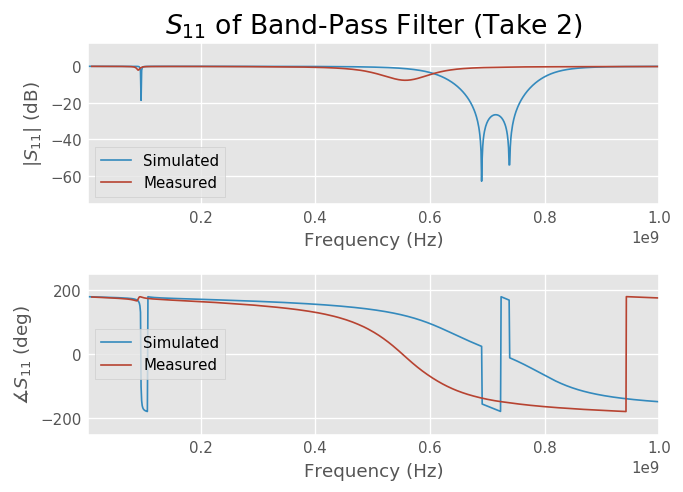

In [77]:
measured_S11 = bpf_2_data.s[:,0,0]
measured_freqs = np.divide(bpf_2_data.frequency.w, 2*np.pi)
sim_S11 = [x[1] for x in bpf_2_sim]
sim_freqs = [x[0] for x in bpf_2_sim]
w, h = plt.figaspect(0.7)
fig = plt.figure(figsize=(w,h))
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(sim_freqs, mag2db(np.abs(sim_S11)))
plt.plot(measured_freqs, mag2db(np.abs(measured_S11)))
plt.legend(['Simulated', 'Measured'])
plt.title('$S_{11}$ of Band-Pass Filter (Take 2)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(sim_freqs, rad2deg(np.angle(sim_S11)))
plt.plot(measured_freqs, rad2deg(np.angle(measured_S11)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$\measuredangle S_{11}$ (deg)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/bpf_take2_S11.pdf', bbox_inches='tight', dpi=300)

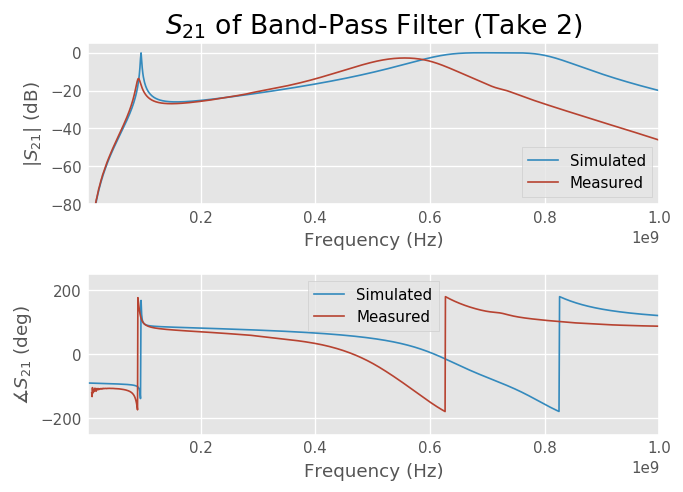

In [78]:
measured_S21 = bpf_2_data.s[:,1,0]
measured_freqs = np.divide(bpf_2_data.frequency.w, 2*np.pi)
sim_S21 = [x[2] for x in bpf_2_sim]
sim_freqs = [x[0] for x in bpf_2_sim]
w, h = plt.figaspect(0.7)
fig = plt.figure(figsize=(w,h))
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(sim_freqs, mag2db(np.abs(sim_S21)))
plt.plot(measured_freqs, mag2db(np.abs(measured_S21)))
plt.ylim([-80, 5])
plt.legend(['Simulated', 'Measured'])
plt.title('$S_{21}$ of Band-Pass Filter (Take 2)')
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(sim_freqs, rad2deg(np.angle(sim_S21)))
plt.plot(measured_freqs, rad2deg(np.angle(measured_S21)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$\measuredangle S_{21}$ (deg)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/bpf_take2_S21.pdf', bbox_inches='tight', dpi=300)

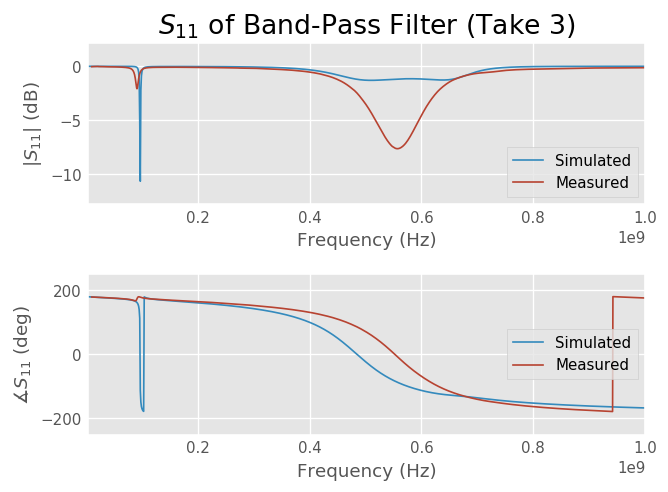

In [83]:
bpf_2_sim = read_csv('data/Lab2_withwireparasitics.csv')
measured_S11 = bpf_2_data.s[:,0,0]
measured_freqs = np.divide(bpf_2_data.frequency.w, 2*np.pi)
sim_S11 = [x[1] for x in bpf_2_sim]
sim_freqs = [x[0] for x in bpf_2_sim]
w, h = plt.figaspect(0.7)
fig = plt.figure(figsize=(w,h))
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(sim_freqs, mag2db(np.abs(sim_S11)))
plt.plot(measured_freqs, mag2db(np.abs(measured_S11)))
plt.legend(['Simulated', 'Measured'])
plt.title('$S_{11}$ of Band-Pass Filter (Take 3)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(sim_freqs, rad2deg(np.angle(sim_S11)))
plt.plot(measured_freqs, rad2deg(np.angle(measured_S11)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$\measuredangle S_{11}$ (deg)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/bpf_take3_S11.pdf', bbox_inches='tight', dpi=300)

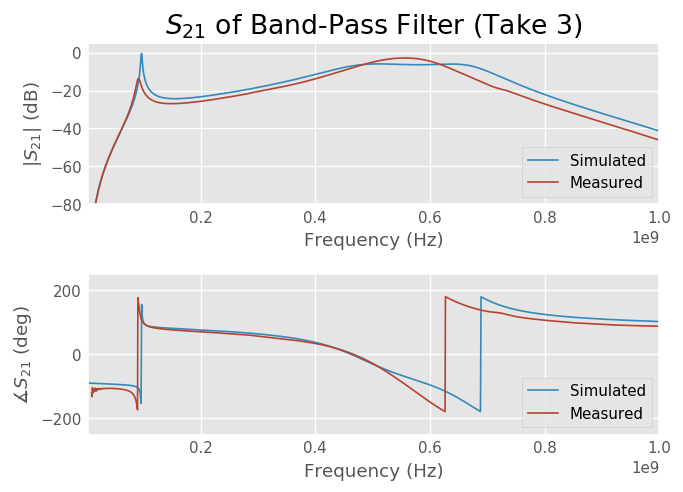

In [84]:
measured_S21 = bpf_2_data.s[:,1,0]
measured_freqs = np.divide(bpf_2_data.frequency.w, 2*np.pi)
sim_S21 = [x[2] for x in bpf_2_sim]
sim_freqs = [x[0] for x in bpf_2_sim]
w, h = plt.figaspect(0.7)
fig = plt.figure(figsize=(w,h))
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(sim_freqs, mag2db(np.abs(sim_S21)))
plt.plot(measured_freqs, mag2db(np.abs(measured_S21)))
plt.ylim([-80, 5])
plt.legend(['Simulated', 'Measured'])
plt.title('$S_{21}$ of Band-Pass Filter (Take 3)')
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(sim_freqs, rad2deg(np.angle(sim_S21)))
plt.plot(measured_freqs, rad2deg(np.angle(measured_S21)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$\measuredangle S_{21}$ (deg)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/bpf_take3_S21.pdf', bbox_inches='tight', dpi=300)